<a href="https://colab.research.google.com/github/snsamarasekara/Portfolio_Projects/blob/main/Hospital_readmission_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetic patient hospital readmission prediction.

Objective: Hospital readmission rates for certain conditions are indicators of hospital quality, and affect the cost of care adversely. Hospital readmissions of high risk patients are expensive as hospitals face penalties if their readmission rate is higher than expected and reflects the inadequacies in health care system. Therefore, it is important for the hospitals to focus on reducing readmission rates. This can be done by Identifying the key factors that influence readmission for diabetes and by predicting the probability of patient readmission.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statistics import mode
import IPython

In [ ]:
df = pd.read_csv("/content/diabetic_data.csv")
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


Data Wrangling

In [ ]:
 #missing values

df2 = df.copy() 
Rep = df2.replace('?', np.NaN) 
nacheck = Rep.isnull().sum() 
nacheck


encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
# Weight,payer_code and medical_specialty have a lot of missing values therefore ,remove these columns

df2= df2.drop(['weight','payer_code','medical_specialty'],axis=1)


In [ ]:
# converst the target column to categorical
df2['readmitted']
df2['30readmit'] = np.where(df2['readmitted'] == 'NO', 0, 1)
df2.groupby('30readmit').size()


30readmit
0    54864
1    46902
dtype: int64

In [ ]:
#removing dead individuals
df2 = df2[((df2.discharge_disposition_id != 11) & 
                                          (df2.discharge_disposition_id != 13) &
                                          (df2.discharge_disposition_id != 14) & 
                                          (df2.discharge_disposition_id != 19) & 
                                          (df2.discharge_disposition_id != 20) & 
                                          (df2.discharge_disposition_id != 21))] 

In [ ]:
df2.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30readmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


Exploratory data analysis

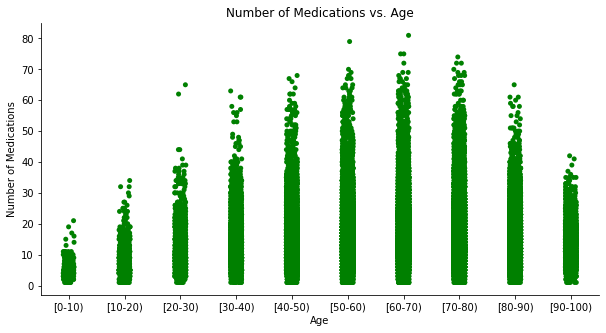

In [ ]:
#correlation between variables, Age and medication
sortage = df2.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'green')
sns.despine() 
x.figure.set_size_inches(10, 5)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()


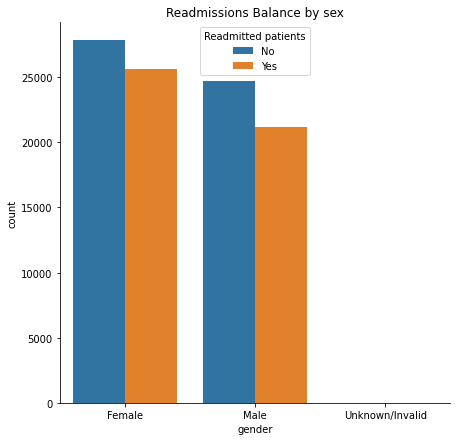

In [ ]:
#sex and Readmissions
plot1 = sns.countplot(x = 'gender', hue = '30readmit', data = df2) 

sns.despine()
plot1.figure.set_size_inches(7, 7)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by sex')
plt.show()


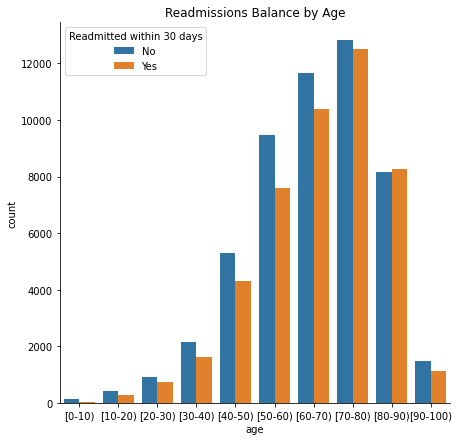

In [ ]:
#correlation between age and readmission,

a = df2.age.unique()
a.sort()
a_sort = np.array(a).tolist()


ageplt = sns.countplot(x = 'age', hue = '30readmit', data = df2, order = a_sort) 

sns.despine()
ageplt.figure.set_size_inches(7, 7)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

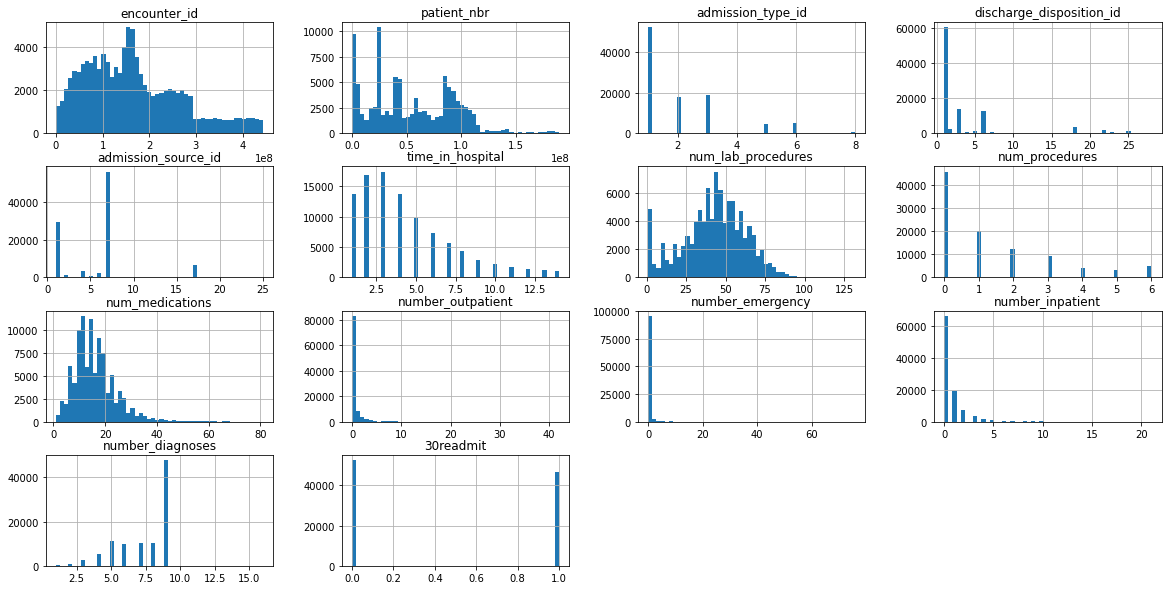

In [ ]:
# numerical variables 
%matplotlib inline
import matplotlib.pyplot as plt
df2.hist(bins=50, figsize=(20,10))
plt.show()


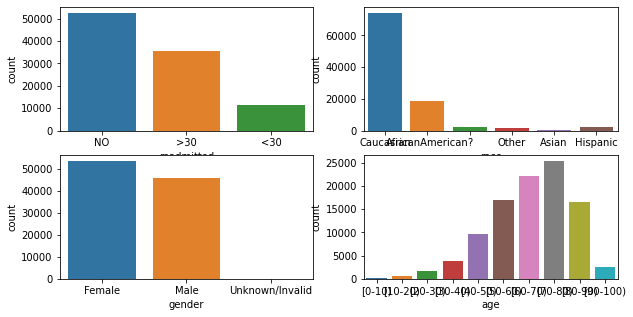

In [ ]:
# categorical variables
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=df2, ax=ax[0][0])
sns.countplot(x="race", data=df2, ax=ax[0][1])
sns.countplot(x="gender", data=df2, ax=ax[1][0])
sns.countplot(x="age", data=df2, ax=ax[1][1])



ML models in predicting readmission

In [ ]:
# Data cleaning :  null values in numeric data replaced by 0 and object data by unknown

numcolumn = df2.select_dtypes(include = [np.number]).columns
objcolumn = df2.select_dtypes(include = ['object']).columns

df2[numcolumn] = df2[numcolumn].fillna(0)
df2[objcolumn] = df2[objcolumn].fillna("unknown")

In [ ]:
# data encoding
def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    
    
    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})  
            count += 1
    return dictcout
  

def codemap(df, codes):
    import pandas as pd
    namecol = df.columns.tolist()
    for col in namecol:
        temp = [] 
        for num in df[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(codes[lkup])           
        df.loc[:, col] = temp               
    return df 


listcol = ['diag_1', 'diag_2', 'diag_3']
codes = map_now()
df2[listcol] = codemap(df2[listcol], codes)


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [ ]:
# drop non relavent columns
df3 = df2.drop(['encounter_id', "patient_nbr", 'admission_type_id','readmitted'], axis =1)

In [ ]:
df3.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,30readmit
0,Caucasian,Female,[0-10),25,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,7,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,AfricanAmerican,Female,[20-30),1,7,2,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,7,2,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,7,1,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0


Data encoding and normalization

In [ ]:
listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

df2[listnormal] = normal.fit_transform(df3[listnormal])

df3.describe()


,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,30readmit
count,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000
mean,3.517882,5.731083,4.379332,42.906929,1.334236,15.979062,0.369246,0.198444,0.630935,7.401709,0.471256
std,5.184359,4.065029,2.968409,19.610032,1.702786,8.094909,1.265142,0.937734,1.260428,1.941013,0.499176
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000


In [ ]:
Y = df3['30readmit'] # readmitted in y 
X = df3.drop(['30readmit'], axis =1) # non in x
X = pd.get_dummies(X)


In [ ]:
# train test split (80:20)
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)


Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(logisticreg.score(Xtest, Ytest)) # accuracy, accuracy is low not a good model to use


0.6281644773264885


Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42,n_estimators=100)
random_forest.fit(Xtrain, Ytrain)
Yrandforest = random_forest.predict(Xtest)


In [ ]:
print(random_forest.score(Xtest, Ytest)) # accuracy 

0.630479641652826


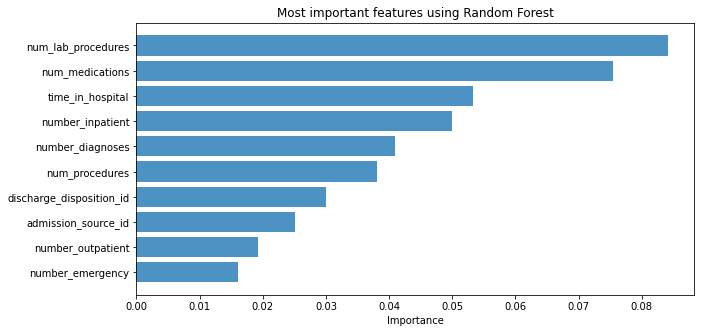

In [ ]:
#Determining feature importance according to random forest
feature_names = Xtrain.columns
feature_imports = random_forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,5))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=10)
plt.xlabel('Importance')
plt.title('Most important features using Random Forest')
plt.show()


In [ ]:
# can change the number of trees and use more important features to get higher accuracy and re train the models
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=47,n_estimators=500)
random_forest.fit(Xtrain, Ytrain)
Yrandforest = random_forest.predict(Xtest)

In [ ]:
print(random_forest.score(Xtest, Ytest))

0.6356635965574513


In [ ]:
d43 = df3.drop(['number_emergency', "number_outpatient"], axis =1)

In [ ]:
Y = df4['30readmit'] 
X = df4.drop(['30readmit'], axis =1)
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)
